In [122]:
from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
)

In [123]:
results_dir = Path("results") / "husky"
# values = np.load(results_dir / "results_optim6_CNN_mw_1.7.npy", allow_pickle=True).item()
# values = np.load(results_dir / "results_hamming_CNN_mw_1.7.npy", allow_pickle=True).item()
values = np.load(results_dir / "results_hamming_CNN_mw_1.7.npy", allow_pickle=True).item()
terrains = np.array([t for t in values["terrains"] if t != "MIXED"])
inv_terrains = {t: i for i, t in enumerate(terrains)}
values

{'pred': array([0, 0, 0, ..., 4, 4, 4]),
 'true': array([0, 0, 0, ..., 4, 4, 4]),
 'conf': array([[9.99991894e-01, 3.11476128e-06, 1.73672155e-12, 4.65427664e-14,
         5.00060241e-06],
        [1.00000000e+00, 1.92131100e-22, 6.57219166e-14, 3.32694284e-21,
         2.40250419e-13],
        [1.00000000e+00, 4.78890944e-31, 3.75592366e-14, 3.48852831e-25,
         7.04636138e-14],
        ...,
        [1.03206485e-10, 6.26434117e-22, 5.91133526e-28, 1.00852739e-08,
         1.00000000e+00],
        [2.03340611e-09, 7.19189248e-14, 2.13457160e-16, 1.47633999e-12,
         1.00000000e+00],
        [1.29363364e-09, 2.55578110e-16, 4.81554589e-16, 2.27801805e-10,
         1.00000000e+00]], dtype=float32),
 'ftime': array([], dtype=float64),
 'ptime': array([], dtype=float64),
 'channels': {'imu': {'wx': True,
   'wy': True,
   'wz': True,
   'ax': True,
   'ay': True,
   'az': True},
  'pro': {'velL': True, 'velR': True, 'curL': True, 'curR': True}},
 'terrains': ['ASPHALT', 'FLOORING',

In [124]:
clf_values = values
# clf_values = values[1700]

def convert_to_int(x):
    if x.dtype == str:
        return np.array([inv_terrains[t] for t in x])
    return x

ypred = convert_to_int(clf_values["pred"])
ytest = convert_to_int(clf_values["true"])
terr_pred = terrains[ypred]
terr_test = terrains[ytest]

Text(0.5, 1.0, 'husky hamming window')

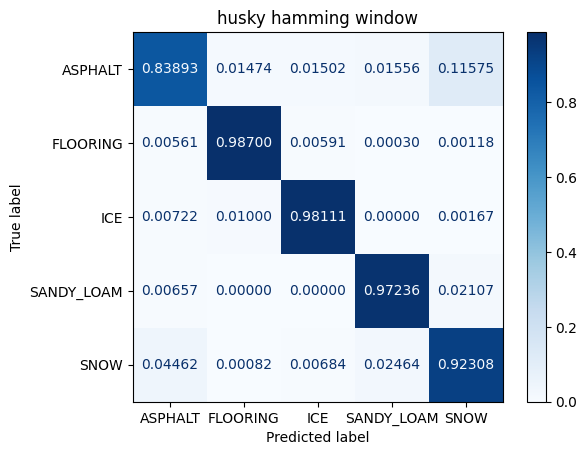

In [125]:
disp = ConfusionMatrixDisplay.from_predictions(
    terr_test,
    terr_pred,
    labels=terrains,
    display_labels=terrains,
    normalize="true",
    values_format=".5f",
    cmap="Blues",
)
disp.ax_.set_title(results_dir.stem + ' hamming window')

Text(0.5, 1.0, 'husky')

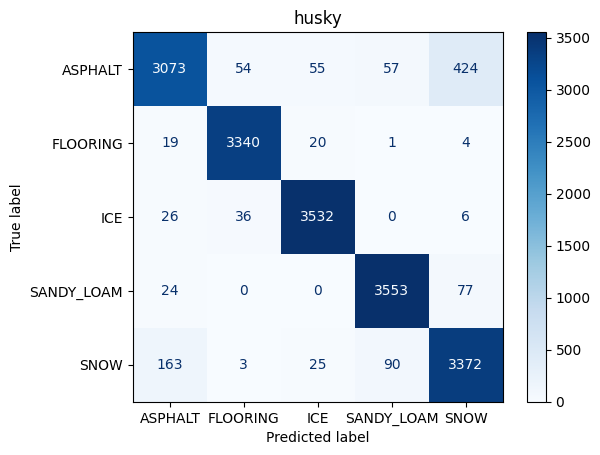

In [126]:
disp = ConfusionMatrixDisplay.from_predictions(
    terr_test,
    terr_pred,
    labels=terrains,
    display_labels=terrains,
    cmap="Blues",
)
disp.ax_.set_title(results_dir.stem)

In [127]:
metrics = pd.Series(
    {
        "accuracy": accuracy_score(
            ytest,
            ypred,
        ),
        "precision": precision_score(
            ytest,
            ypred,
            labels=terrains,
            average=None,
        ),
        "recall": recall_score(
            ytest,
            ypred,
            labels=terrains,
            average=None,
        ),
        "f1-score": f1_score(
            ytest,
            ypred,
            labels=terrains,
            average=None,
        ),
    }
)

/home/william/Documents/Programming/Vulpi2021-terrain-deep-learning/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/william/Documents/Programming/Vulpi2021-terrain-deep-learning/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/william/Documents/Programming/Vulpi2021-terrain-deep-learning/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted

In [128]:
metrics

accuracy                      0.939623
precision    [0.0, 0.0, 0.0, 0.0, 0.0]
recall       [0.0, 0.0, 0.0, 0.0, 0.0]
f1-score     [0.0, 0.0, 0.0, 0.0, 0.0]
dtype: object